# Task 3: Heart Disease Prediction

Step 1: Load & Understand the Dataset

In [4]:
import pandas as pd

# Load dataset
df = pd.read_csv("heart.csv")  # Change the filename if needed

# Display the first 5 rows
print(" Sample Data:")
display(df.head())

# Dataset information
print("\n Dataset Info:")
print(df.info())

# Check for missing values
print("\n Missing Values:")
print(df.isnull().sum())

# Statistical summary
print("\n Statistical Summary:")
display(df.describe())


 Sample Data:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0



 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None

 Missing Values:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal     

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


 Step 2: Data Cleaning

In [6]:
# Step 2: Data Cleaning

import numpy as np

# Check missing values again (in case of NaNs encoded differently)
print(" Missing values (before cleaning):")
print(df.isnull().sum())

# If any columns like 'ca' or 'thal' have "?" or other non-numeric entries, fix them:
# Replace "?" with NaN, if dataset has such values
df.replace("?", np.nan, inplace=True)

# Convert any object columns to numeric (if needed)
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Check missing values after conversion
print("\n Missing values (after replacing '?'):")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Final check
print(f"\n Cleaned dataset shape: {df.shape}")
print(" All missing values cleaned and data is numeric.")


 Missing values (before cleaning):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Missing values (after replacing '?'):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

 Cleaned dataset shape: (1025, 14)
 All missing values cleaned and data is numeric.


Step 3: EDA (Exploratory Data Analysis)

Step 3.1 – Target Class Distribution

C:\Users\PC Partner-User1\AppData\Local\Temp\ipykernel_11244\667607016.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="target", palette="Set2")


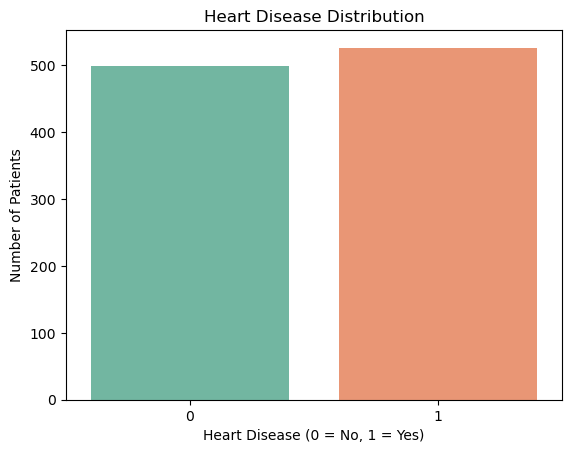

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution (0 = No disease, 1 = Heart disease)
sns.countplot(data=df, x="target", palette="Set2")
plt.title("Heart Disease Distribution")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Number of Patients")
plt.show()


 Step 3.2 – Age vs Heart Disease

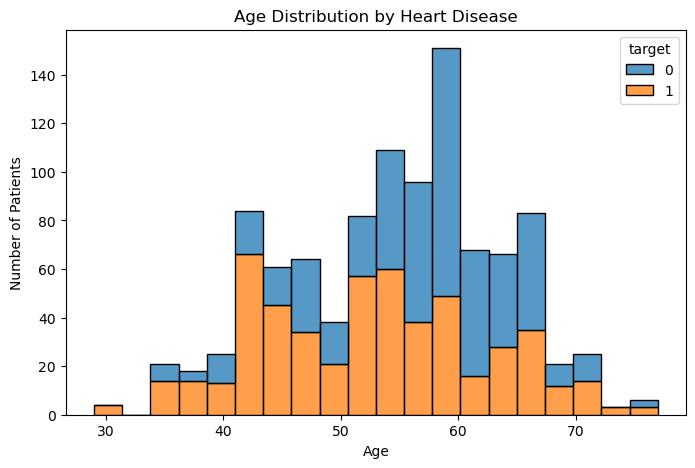

In [8]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='target', multiple='stack', bins=20)
plt.title("Age Distribution by Heart Disease")
plt.xlabel("Age")
plt.ylabel("Number of Patients")
plt.show()


 Step 3.3 – Correlation Heatmap

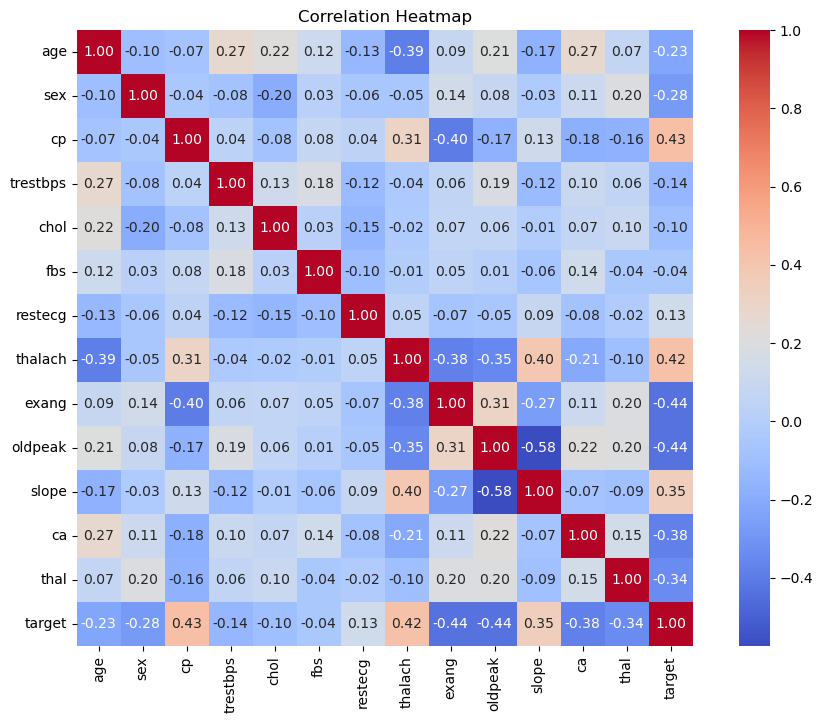

In [9]:
# Plot correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Heatmap")
plt.show()


Step 3.4 – Pair Plot

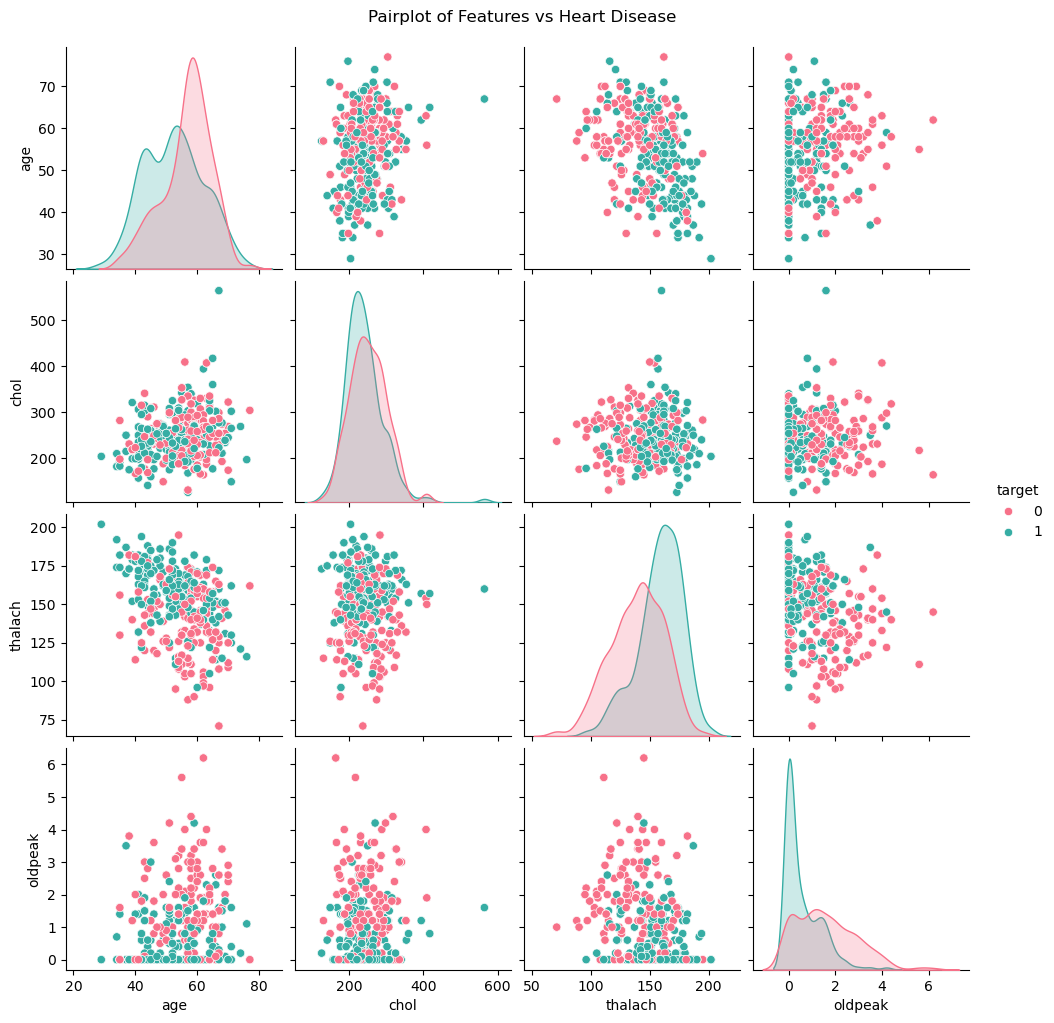

In [10]:
# Only use a subset for cleaner plots
sns.pairplot(df[['age', 'chol', 'thalach', 'oldpeak', 'target']], hue='target', palette="husl")
plt.suptitle("Pairplot of Features vs Heart Disease", y=1.02)
plt.show()


    Step 4: Model Training – Logistic Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


Step 4.1 – Define Features (X) and Target (y)

In [12]:
# Separate input features and target
X = df.drop("target", axis=1)
y = df["target"]


Step 4.2 – Train-Test Split

In [13]:
# Split dataset into 80% train, 20% test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Step 4.3 – Feature Scaling (Standardization)

In [14]:
# Standardize features (important for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Step 4.4 – Train Logistic Regression Model

In [15]:
# Create and train the model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)


LogisticRegression()

 Step 4.5 – Evaluate Accuracy

In [17]:
# Predict on test data
y_pred = model.predict(X_test_scaled)

# Evaluate
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f}")


 Accuracy: 0.7951


Step 5: Model Evaluation

 Step 5.1 – Confusion Matrix

e:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129658 (\N{STETHOSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


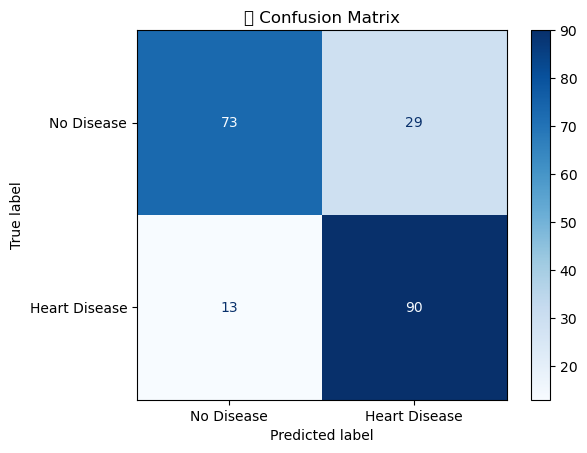

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot it
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Heart Disease"])
disp.plot(cmap="Blues")
plt.title("🩺 Confusion Matrix")
plt.show()


Step 5.2 – Classification Report

In [20]:
from sklearn.metrics import classification_report

# Print classification report
print(" Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78       102
           1       0.76      0.87      0.81       103

    accuracy                           0.80       205
   macro avg       0.80      0.79      0.79       205
weighted avg       0.80      0.80      0.79       205



 Step 5.3 – ROC Curve and AUC Score

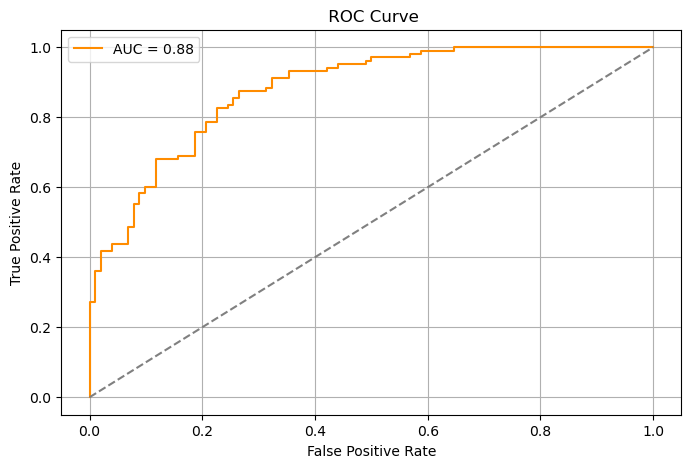

In [28]:
# Get predicted probabilities for ROC
y_probs = model.predict_proba(X_test_scaled)[:, 1]  # Probability of class 1

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = roc_auc_score(y_test, y_probs)

# Plot ROC Curve
plt.figure(figsize=(8, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}", color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(" ROC Curve")
plt.legend()
plt.grid()
plt.show()


 Step 6
: Feature Importance (via Coefficients in Logistic Regression)

In [23]:
# Step 6: Feature Importance (Coefficients)

# Get feature names and corresponding coefficients
feature_names = X.columns
coefficients = model.coef_[0]

# Create DataFrame of features and their importance
importance_df = pd.DataFrame({
    "Feature": feature_names,
    "Coefficient": coefficients,
    "Absolute Importance": abs(coefficients)
}).sort_values(by="Absolute Importance", ascending=False)

# Show top features
print("🔍 Top Important Features:")
display(importance_df.head())


🔍 Top Important Features:


,Feature,Coefficient,Absolute Importance
2,cp,0.885835,0.885835
11,ca,-0.847522,0.847522
1,sex,-0.835665,0.835665
9,oldpeak,-0.765406,0.765406
12,thal,-0.656856,0.656856


 Step 7: Visualize & Explain Results

 Step 7.1 – Feature Importance Bar Plot

C:\Users\PC Partner-User1\AppData\Local\Temp\ipykernel_11244\237826572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Absolute Importance", y="Feature", palette="viridis")
C:\Users\PC Partner-User1\AppData\Local\Temp\ipykernel_11244\237826572.py:7: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
e:\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


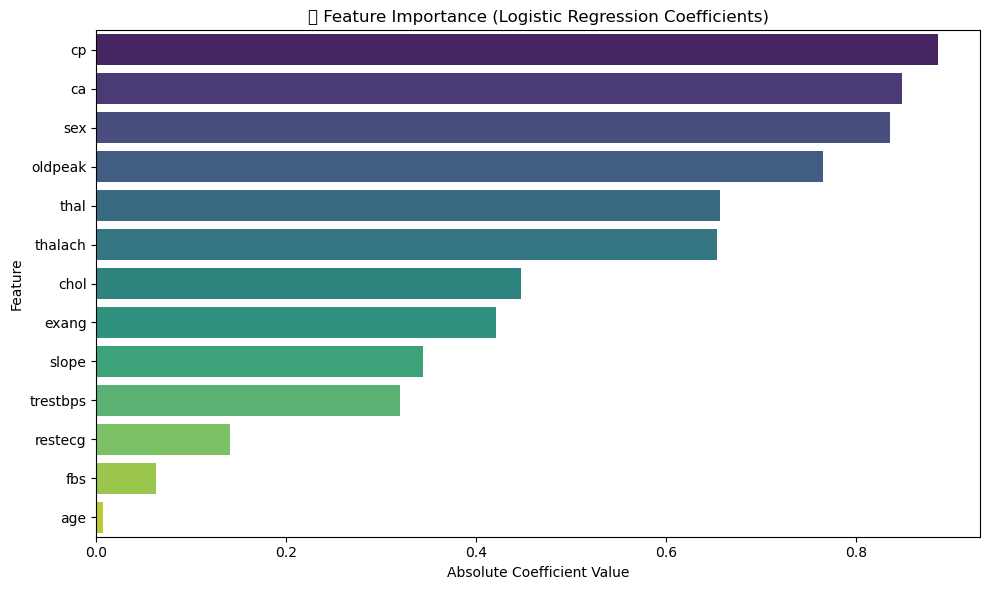

In [24]:
# Bar plot for feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x="Absolute Importance", y="Feature", palette="viridis")
plt.title("📌 Feature Importance (Logistic Regression Coefficients)")
plt.xlabel("Absolute Coefficient Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


Step 7.2 – Recap: Accuracy & ROC-AUC

In [26]:
print(f" Accuracy: {accuracy:.4f}")
print(f" ROC-AUC Score: {roc_auc:.4f}")


 Accuracy: 0.7951
 ROC-AUC Score: 0.8787


Step 9: Predict for a New Patient

In [27]:
# New patient sample
new_patient = pd.DataFrame([{
    'age': 54,
    'sex': 1,
    'cp': 0,
    'trestbps': 130,
    'chol': 250,
    'fbs': 0,
    'restecg': 1,
    'thalach': 150,
    'exang': 0,
    'oldpeak': 1.5,
    'slope': 2,
    'ca': 0,
    'thal': 2
}])

# Scale using the same scaler used during training
new_patient_scaled = scaler.transform(new_patient)

# Predict
pred = model.predict(new_patient_scaled)[0]
prob = model.predict_proba(new_patient_scaled)[0][1]  # Probability of heart disease

# Output
if pred == 1:
    print(f" Prediction: At risk of heart disease (Probability: {prob:.2f})")
else:
    print(f" Prediction: Not at risk of heart disease (Probability: {prob:.2f})")


 Prediction: Not at risk of heart disease (Probability: 0.50)


Save Trained Model as .pkl

In [29]:
import joblib
# Save model
joblib.dump(model, "heart_disease_model.pkl")

# Save scaler (important for future predictions)
joblib.dump(scaler, "scaler.pkl")


['scaler.pkl']

Load Trained Model Later

In [30]:
# Load model and scaler
loaded_model = joblib.load("heart_disease_model.pkl")
loaded_scaler = joblib.load("scaler.pkl")

# Example usage
scaled_input = loaded_scaler.transform(new_patient)
prediction = loaded_model.predict(scaled_input)
